<a href="https://colab.research.google.com/github/croesusking/cse480-notebooks/blob/master/03_4_DFA_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First let's import, then look for DFA Examples/Tasks below

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 5.23 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_d

In [ ]:
odd0Even1 = md2mc('''
DFA

!! DFA that accepts so long as the string seen so far 
!! has odd0s and even1s (in any order)

!! State design: I'll tag along letters "EO, OE, etc."
!! to indicate parity of 0's and 1's

I_EE : 0 -> F_OE
I_EE : 1 -> S_EO

S_EO : 0 -> S_OO
S_EO : 1 -> I_EE

F_OE : 0 -> I_EE
F_OE : 1 -> S_OO

S_OO : 0 -> S_EO
S_OO : 1 -> F_OE

''')

Generating LALR tables


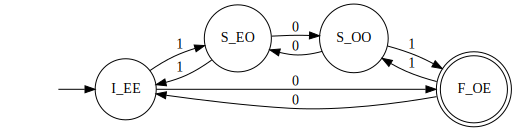

In [ ]:
dotObj_dfa(odd0Even1)

In [ ]:
# Now arrive at this via DFA intersection

Odd0 = md2mc('''
DFA
I : 1 -> I
I : 0 -> F

F : 1 -> F
F : 0 -> I
''')

Even1 = md2mc('''
DFA
IF : 0 -> IF
IF : 1 -> S

S : 0 -> S
S : 1 -> IF
''')

Odd0_and_Even1 = intersect_dfa(Odd0, Even1)

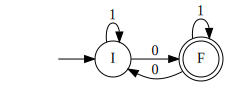

In [ ]:
dotObj_dfa(Odd0)

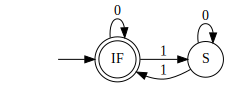

In [ ]:
dotObj_dfa(Even1)

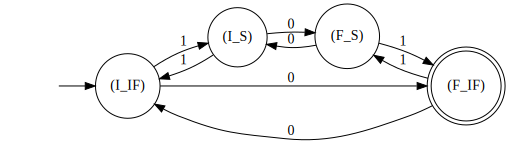

In [ ]:
dotObj_dfa(Odd0_and_Even1)

# Now you do the union of Odd0 and Even1
## Then try it via DeMorgan's law

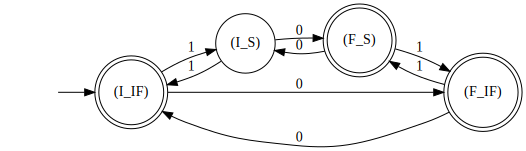

In [ ]:
# Put your answers here:
# Union algo
dotObj_dfa(union_dfa(Odd0, Even1))
# DeMorgan's law
# As shown in code blocks below

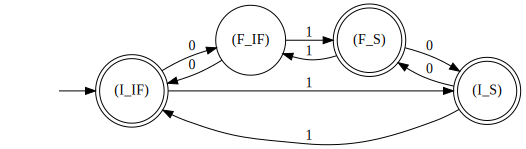

In [ ]:
dotObj_dfa(union_dfa(comp_dfa(Odd0), comp_dfa(Even1)))

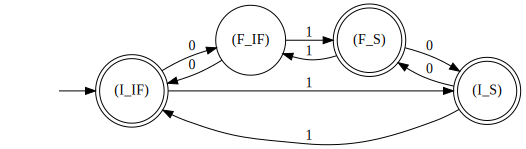

In [ ]:
#Min
min1 = min_dfa(union_dfa(comp_dfa(Odd0), comp_dfa(Even1)))
dotObj_dfa(min_dfa(union_dfa(comp_dfa(Odd0), comp_dfa(Even1))))

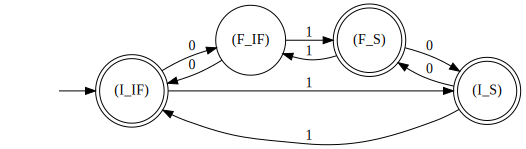

In [ ]:
dotObj_dfa(comp_dfa(intersect_dfa(Odd0,Even1)))

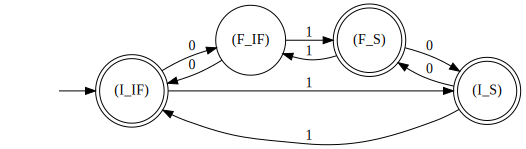

In [ ]:
# Min
min2 = min_dfa(comp_dfa(intersect_dfa(Odd0,Even1)))
dotObj_dfa(min2)

In [ ]:
# DeMorgan's Law
union_dfa(comp_dfa(Odd0), comp_dfa(Even1)) == comp_dfa(intersect_dfa(Odd0,Even1))

True

In [ ]:
# Min DeMorgan's Law
min1 == min2

True

In [ ]:
Odd0FbyEven1 = md2mc('''
DFA

!! DFA that accepts so long as the string seen so far 
!! has odd0s and even1s (in THAT order)

!! State design: Must close-off 0's after seeing a 1
!! I'll denote this by adding a 'd' for the 0 position
!! So S_EE, Sd_EE, Fd_EE etc, where the 'd' says 0's are unwelcome

I_EE : 0 -> F_OE
I_EE : 1 -> Sd_EO

Sd_EO : 0 -> BH
Sd_EO : 1 -> Sd_EE

F_OE : 0 -> I_EE
F_OE : 1 -> Sd_OO

Sd_OO : 0 -> BH
Sd_OO : 1 -> Fd_OE

Sd_EE : 0 -> BH
Sd_EE : 1 -> Sd_EO

Fd_OE : 0 -> BH
Fd_OE : 1 -> Sd_OO

BH  : 0|1 -> BH
''')

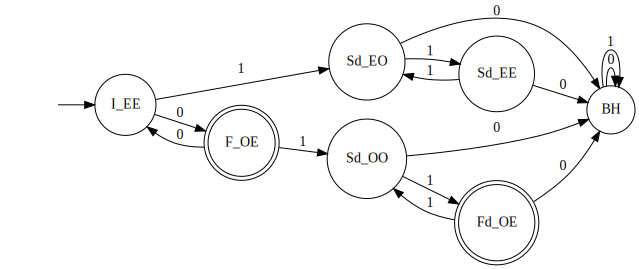

In [ ]:
dotObj_dfa_w_bh(Odd0FbyEven1)

# We can express the language of this DFA as:

$\{ 0^n \;:\; odd(n)\} \; \{ 1^n \;:\; even(n)\}$ 

# Question: 
## A DFA for the unit language has how many states?

# Answer:
## Only one state. It would be the q0, and the F.

# END